# Laminar Newtonian Similarity

As usual, we will begin by importing the necessary python packages

In [1]:
from barennet import SimilarityModel
import tensorflow as tf
import numpy as np

tf.config.set_visible_devices([], 'GPU')

2024-03-05 15:59:27.617662: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 15:59:27.769084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 15:59:27.769165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 15:59:27.796802: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 15:59:27.863118: I tensorflow/core/platform/cpu_feature_guar

We will find the incomplete similarity exponents for the laminar newtonian 
mean velocity profile in wall coordinates. We know that the dimensionless quantities
involved are $(u^+, y^+, Re_\tau)$. They are related through the following equation:

$$ u^+ = y^+ - \frac{1}{2 Re_\tau} \left( y^+ \right)^2.$$

We provide a data file generated following the equation above with $10 < Re_\tau < 100$
and $0 < y^+ < Re_\tau$ (which, in bulk coordinates, translates to $0 < y < \delta$).
The MDDP construction of the three dimensionless quantities is also provided in the 
code cell below.

In [2]:
data_path = "../Data/laminar_MVP_data.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "delta"]
dimensionally_dependent_parameters = ["y", "- dp/dz"]
dimensional_qoi = "u"
non_dimensional_parameters = ["y+", "Re_tau"]
non_dimensional_qoi = "u+"
non_dimensional_params_construction = { 
    "y+": {"y": 1.0, "- dp/dz": 0.5, "mu": -1, "rho": 0.5, "delta": 0.5},
    "Re_tau": {"y": 0.0, "- dp/dz": 0.5, "mu": -1, "rho": 0.5, "delta": 1.5}, 
}
non_dimensional_qoi_construction = {
    "u+": {"u": 1, "y": 0.0, "- dp/dz": -0.5, "mu": 0.0, "rho": 0.5, "delta": -0.5}
}
non_similar_params = ["y+"]
similar_params = ["Re_tau"]

In [3]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

### Buckingham's Similarity Group

As soon as the dimensionless construction is provided and we create an instance 
of the SimilarityModel class, the Buckingham's similarity group can be calculated
by solving a linear system (chapter 5 of the thesis).
It shoud read:
\begin{align*}
    &\mu^* = A_1 \mu, \ \ \ \rho^* = A_2 \rho, \ \ \ \delta^* = A_3 \delta \\ & \\
    & y^* = A_3 y \\ & \\
    & \left( \frac{dp}{dz} \right)^* = \frac{A_1^2}{A_2 A_3^3} \left( \frac{dp}{dz} \right) \\ & \\
    &U^* = \frac{A_1}{A_2 A_3} U
\end{align*}

And, as you can see, this is exactly the output of the cell below.

In [4]:
similarity_model.print_buckingham_similarity_group()

mu* = A_1^1.0 A_2^0.0 A_3^0.0 mu
rho* = A_1^0.0 A_2^1.0 A_3^0.0 rho
delta* = A_1^0.0 A_2^0.0 A_3^1.0 delta
y* = A_1^0.0 A_2^0.0 A_3^1.0 y
- dp/dz* = A_1^2.0 A_2^-1.0 A_3^-3.0 - dp/dz
u* = A_1^1.0 A_2^-1.0 A_3^-1.0 u


In [5]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=1000, tol=5e-3)

Epoch 1/1000


2024-03-05 15:59:31.646788: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7de00d7fd0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-05 15:59:31.646825: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-03-05 15:59:31.668002: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709665171.768743    9340 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-05 15:59:31.770119: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-05 15:59:31.773524: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-05 15:59:31.778137: E external/local_xla/xl

313/313 - 1s - loss: 0.4614 - 988ms/epoch - 3ms/step
Epoch 2/1000


2024-03-05 15:59:32.037629: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


313/313 - 0s - loss: 0.0457 - 293ms/epoch - 937us/step
Epoch 3/1000


2024-03-05 15:59:32.419234: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


313/313 - 0s - loss: 0.0260 - 275ms/epoch - 880us/step
Epoch 4/1000
313/313 - 0s - loss: 0.0098 - 355ms/epoch - 1ms/step
Epoch 5/1000
313/313 - 0s - loss: 0.0071 - 357ms/epoch - 1ms/step
Epoch 6/1000
313/313 - 0s - loss: 0.0106 - 405ms/epoch - 1ms/step
Epoch 7/1000
313/313 - 0s - loss: 0.0081 - 282ms/epoch - 900us/step
Epoch 8/1000
313/313 - 0s - loss: 0.0054 - 299ms/epoch - 956us/step
Epoch 9/1000
313/313 - 0s - loss: 0.0170 - 345ms/epoch - 1ms/step
Epoch 10/1000
313/313 - 0s - loss: 0.0059 - 436ms/epoch - 1ms/step
Epoch 11/1000


2024-03-05 15:59:35.369676: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


313/313 - 0s - loss: 0.0051 - 450ms/epoch - 1ms/step
Epoch 12/1000
313/313 - 0s - loss: 0.0091 - 258ms/epoch - 824us/step
Epoch 13/1000
313/313 - 0s - loss: 0.0069 - 249ms/epoch - 797us/step
Epoch 14/1000
313/313 - 0s - loss: 0.0050 - 332ms/epoch - 1ms/step
Epoch 15/1000
313/313 - 0s - loss: 0.0055 - 261ms/epoch - 834us/step
Epoch 16/1000
313/313 - 0s - loss: 0.0056 - 358ms/epoch - 1ms/step
Epoch 17/1000
313/313 - 0s - loss: 0.0055 - 348ms/epoch - 1ms/step
Epoch 18/1000
313/313 - 0s - loss: 0.0069 - 423ms/epoch - 1ms/step
Epoch 19/1000
313/313 - 0s - loss: 0.0071 - 371ms/epoch - 1ms/step
Epoch 20/1000
313/313 - 0s - loss: 0.0052 - 319ms/epoch - 1ms/step
Epoch 21/1000
313/313 - 0s - loss: 0.0054 - 434ms/epoch - 1ms/step
Epoch 22/1000
313/313 - 0s - loss: 0.0046 - 388ms/epoch - 1ms/step
Epoch 23/1000
313/313 - 0s - loss: 0.0052 - 410ms/epoch - 1ms/step
Epoch 24/1000
313/313 - 0s - loss: 0.0063 - 316ms/epoch - 1ms/step
Epoch 25/1000
313/313 - 0s - loss: 0.0051 - 273ms/epoch - 872us/step
E

KeyboardInterrupt: 

In [6]:
similarity_model.incomplete_similarity_exponents_dict

AttributeError: 'SimilarityModel' object has no attribute 'incomplete_similarity_exponents_dict'

In [ ]:
similarity_model.print_renormalization_group()

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
import seaborn as sns

from tutorial_utils.plotting_methods import (get_laminar_data_for_plotting,
                                             plot_laminar_flow)
from tutorial_utils.physical_methods import laminar_flow_wall_coordinates

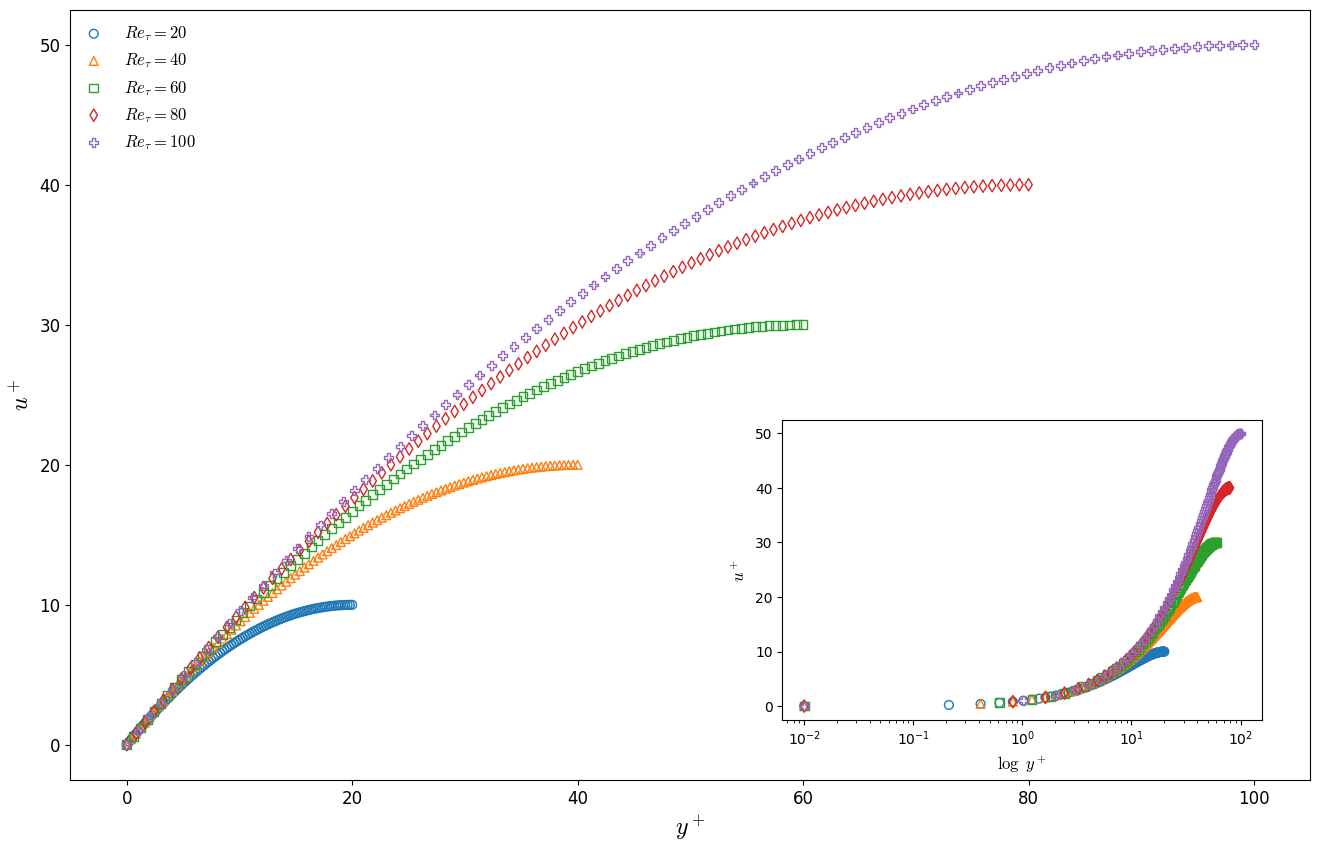

In [8]:
U_plus, Y_plus, Re_tau = get_laminar_data_for_plotting()

plot_laminar_flow(U_plus, Y_plus, Re_tau)

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.57, 0.17, 0.3, 0.3] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']
line_width = 1

for i in range(len(possible_re_tau)):
    ax1.scatter(np.array(Y_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['y+']['Re_tau']),
                 np.array(U_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['u+']['Re_tau']),
                 alpha = 1, s=40, linewidth = line_width, facecolors = 'none', 
                 color = colors[i], marker = markers[i], 
                  label = r'$Re_\tau= $'+r'${}$'.format(possible_re_tau[i]))
    
    ax2.scatter(np.array(Y_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['y+']['Re_tau']),
                 np.array(U_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['u+']['Re_tau']),
                 alpha = 1, s=40, linewidth = line_width, facecolors = 'none', 
                 color = colors[i], marker = markers[i], 
                  label = r'$Re_\tau= $'+r'${}$'.format(possible_re_tau[i]))
    
font = font_manager.FontProperties(family='DejaVu Sans', weight='roman',
                                   style='normal', size = 'large',
                                   stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0., 0.99), loc = 'upper left', edgecolor = 'white',
            framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+ / Re_\tau^{0.95}$", size = 'xx-large', fontweight = 'black')
ax1.set_ylabel(r'$u^+ / Re_\tau^{0.97}$', size = 'xx-large')
#ax1.set_ylim([5,14])
ax1.grid(False)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log \ \left( y^+ / Re_\tau^{0.95} \right)$", fontsize = 'large')
ax2.set_ylabel(r'$u^+ / Re_\tau^{0.97}$', fontsize = 'large')
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize = 'medium')
ax2.tick_params(axis='y', labelsize = 'medium')
#ax2.set_xlim([0.01,1])
#ax2.set_ylim([5,14])
ax2.grid(False)

plt.savefig('tutorial_plots/laminar_flow_wall_coordinates_renormalized.pdf', 
            format='pdf', 
            dpi=1200)

plt.show()